# GUC Clustering Project 

In [1]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [2]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
        plt.title('K-Means Clustering')
        plt.show()

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



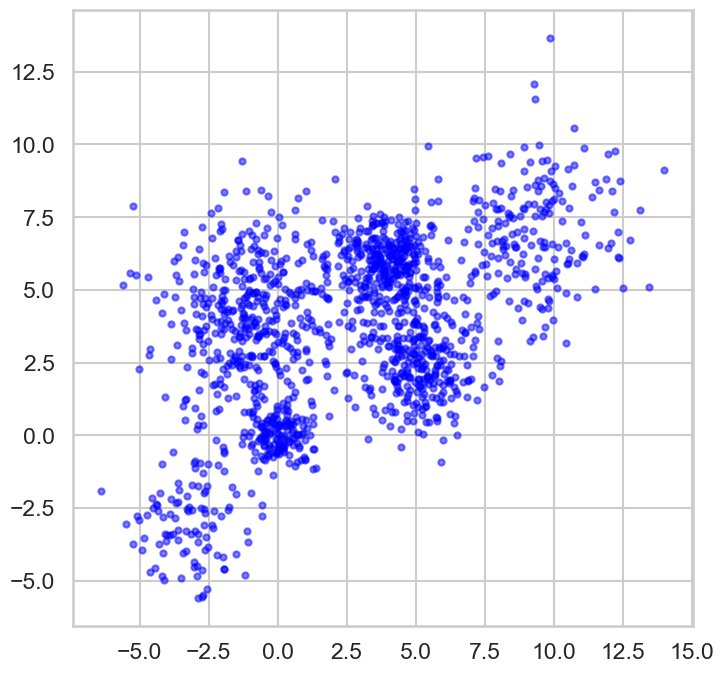

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [6]:
def K_mean(data):  
    # Define range of k values
    k_values = range(2, 11)

    # Initialize arrays to store distortion and silhouette scores for each k value
    distortions = np.zeros(len(k_values))
    silhouette_scores = np.zeros(len(k_values))

    # Iterate over k values and fit K-means models to the data
    clusters = []
    distortions = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(Multi_blob_Data)
        clusters.append(kmeans.labels_)
        distortions.append(kmeans.inertia_)
        
    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)  #%%%%%%(to be decided later)%%%%%%
        
        # cluster centroids 
        # centroids = kmeans.cluster_centers_  %%%%%%(to be decided later)%%%%%%

        # Compute distortion score for current k value
        distortions[i] = kmeans.inertia_

        # Compute silhouette score for current k value
        labels = kmeans.labels_
        silhouette_scores[i] = silhouette_score(data, labels)

        # Print cluster centers and sizes for current k value
        print(f"k={k}:")
        print(kmeans.cluster_centers_)
        print(np.bincount(labels))
        print("-----------------")
        
    # Display the outcome of each value of K 
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()
    
    for i, ax in enumerate(axes):
        if i < len(k_values):
            ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=clusters[i])
            ax.set_title('K = {}'.format(k_values[i]))
            ax.set_xticks(())
            ax.set_yticks(())
        else:
            ax.axis('off')
        
    plt.show()

    # Plot distortion vs. k
    plt.figure()
    plt.plot(k_values, distortions, marker='o')
    plt.title('distortion vs. k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # Plot silhouette score vs. k
    plt.figure()
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('silhouette score vs. k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()

    # Choose the best k value based on silhouette score
    best_k = k_values[np.argmax(silhouette_scores)]
    print(f"Best k value based on silhouette score: {best_k}")

    # Fit K-means model with best k value
    best_kmeans = KMeans(n_clusters=best_k)
    best_kmeans.fit(data) #%%%%%%(to be decided later)%%%%%%
    
    # Store silhouette score for best value of k for later comparison with other 
    best_silhouette_score = silhouette_score(data, best_kmeans.labels_)
    print(f"Silhouette score for best k value: {best_silhouette_score}")
    
    
    #return best silhouette score 
    return best_silhouette_score


k=2:
[[-1.13739834  1.94576622]
 [ 5.57549936  5.00840233]]
[630 820]
-----------------
k=3:
[[ 9.282392    7.02617232]
 [-1.32589368  1.6792901 ]
 [ 4.1739452   4.43052422]]
[190 579 681]
-----------------
k=4:
[[-1.25372388 -0.87486995]
 [ 9.33525812  7.05451123]
 [ 4.47238     4.30602856]
 [-1.06950306  4.53204417]]
[291 188 630 341]
-----------------
k=5:
[[-1.27229641 -0.89588143]
 [ 5.14571224  2.35871056]
 [ 3.84506715  5.93785382]
 [ 9.36856474  7.00625988]
 [-1.1437134   4.40865452]]
[288 281 363 187 331]
-----------------
k=6:
[[-1.256488    4.65982894]
 [ 5.18118901  2.3624744 ]
 [-0.2421039   0.56380425]
 [-3.16735394 -3.03549079]
 [ 9.36856474  7.00625988]
 [ 3.85392481  5.9328261 ]]
[297 278 228  98 187 362]
-----------------
k=7:
[[-3.16735394 -3.03549079]
 [ 4.03184195  5.93724701]
 [ 5.18813904  2.35088167]
 [-2.15093011  3.76055893]
 [ 9.38154326  7.0158176 ]
 [-0.07971938  0.3677181 ]
 [ 0.0294693   5.33928921]]
[ 98 341 275 176 186 202 172]
-----------------
k=8:
[[

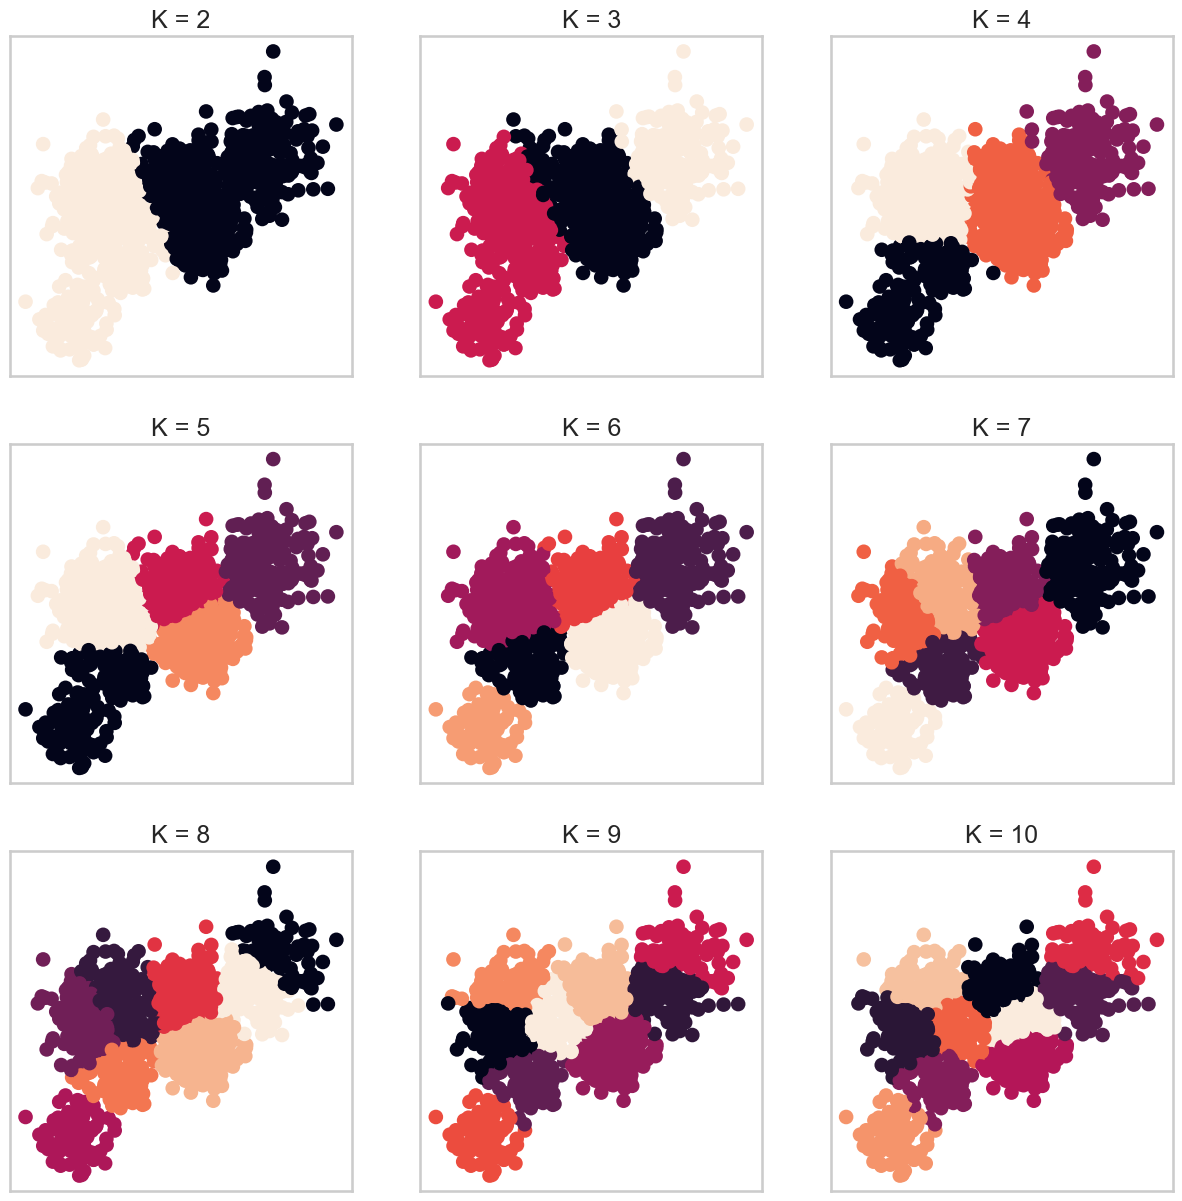

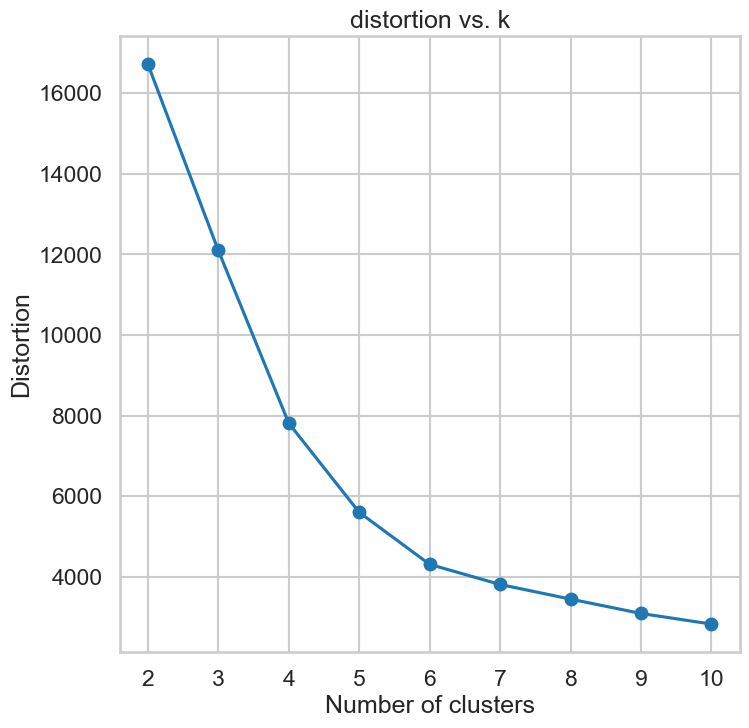

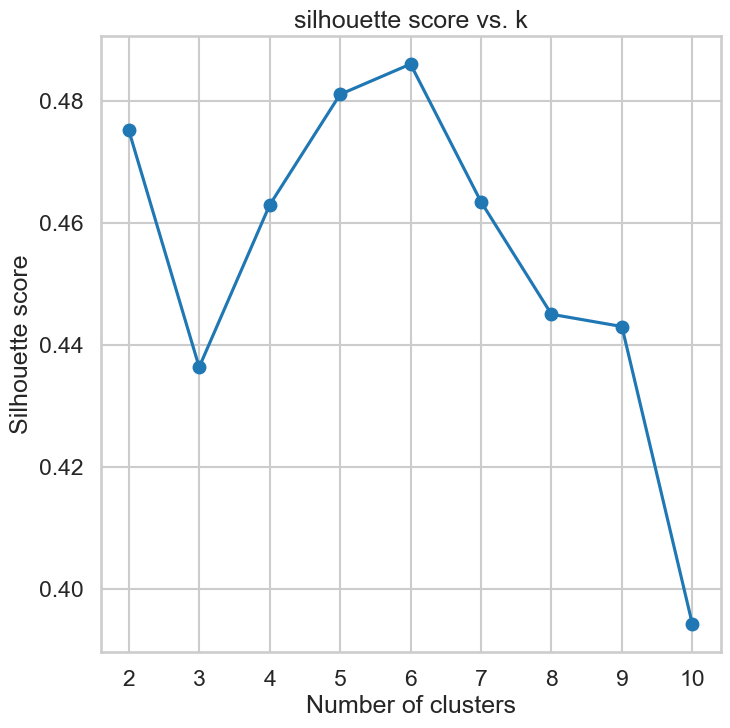

Best k value based on silhouette score: 6
Silhouette score for best k value: 0.4859737366910219


In [7]:
kmean_Multi_blob_Data_silhouette_score = K_mean(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [8]:
def dendrogram_plot(model):
    #create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            #Values less than n_samples correspond to leaves of the tree which are the original samples.
            if child_idx < n_samples:
                current_count += 1  # leaf node
            #A node i greater than or equal to n_samples is a non-leaf node and has children children_[i - n_samples]    
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float) #gives error if not float

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

In [9]:
# Define affinity and linkage types to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']

def hierarchial_clustering(data, affinity, linkage):
    #create variables
    scores=[]
    thresholds=[]
    score_best=-1000
    best_clustering= None
    threshold_best_silhouette=0
    num_clusters=0
    score=-1

    if affinity in affinities:
        if linkage in linkages:
            
            #plot dendrogram (1)
            plt.figure(figsize =(10, 7))
            plt.title(f"{affinity} & {linkage} \n Data Visualize")
            clustering= AgglomerativeClustering(n_clusters = None,affinity=affinity,linkage=linkage, distance_threshold= 0.5).fit(data)
            dendrogram_plot(clustering)
            
            for i in np.arange(0.1,5,0.1):
                clustering= AgglomerativeClustering(n_clusters= None,affinity=affinity,linkage=linkage, distance_threshold= i).fit(data)       

                #check if there is more than one cluster
                if(len(np.unique(clustering.fit_predict(data)))>1):
                    score = silhouette_score(data, clustering.labels_)
                    scores.append(score)
                    thresholds.append(i)

                    # calculate the silhouette_score (2)
                    if(score> score_best):
                        threshold_best_silhouette=i
                        score_best=score
                        best_clustering=clustering
                #i=i+1
                        
                #if there is only one cluster, break
                else:
                    break
            

    # Display clusters and showing labels and number of clusters (3)   
    if(best_clustering!= None):
        labels=best_clustering.labels_
        num_clusters= best_clustering.n_clusters_

        if(len(data[0])<=2):
            plt.figure()
            plt.title(f"{affinity} & {linkage} \n Num clusters = {num_clusters} & Optimum distance threshold = {threshold_best_silhouette}")
            plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.viridis)
            plt.show()

    # Plotting and Recording the observations
    print("Optimum distance threshold =" , threshold_best_silhouette)
    print("Number of Clusters =" , num_clusters)
    print("Score =" , score)
    print("testing....")
    print(thresholds)
    print(scores)
    
    plt.figure()   
    plt.plot(thresholds,scores, 'bx-')
    plt.ylabel("Silhouette Score")
    plt.xlabel("Values of Distance Thresholds")
    plt.title(f"{affinity} & {linkage} \n Silhouette Score vs Distance Thresholds")
    plt.show()  

    return score, num_clusters, threshold_best_silhouette 

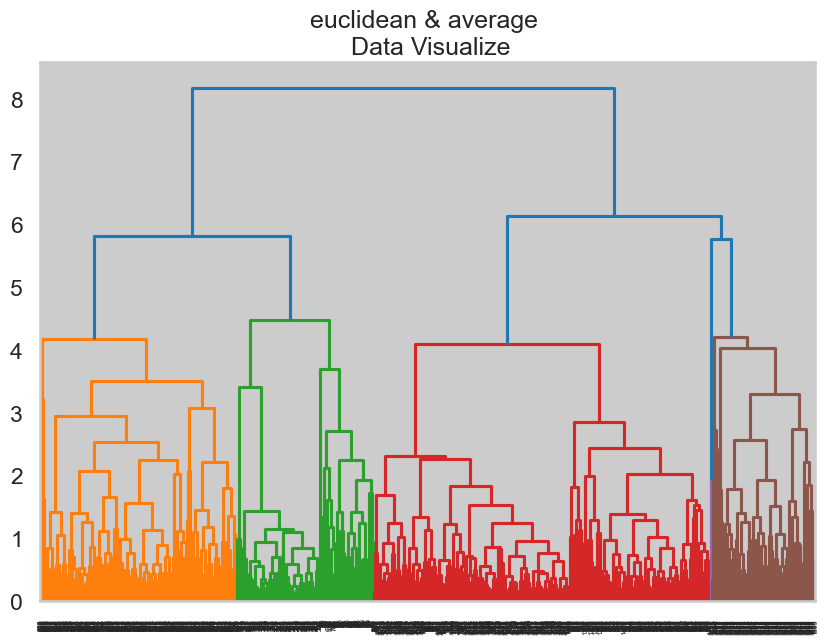

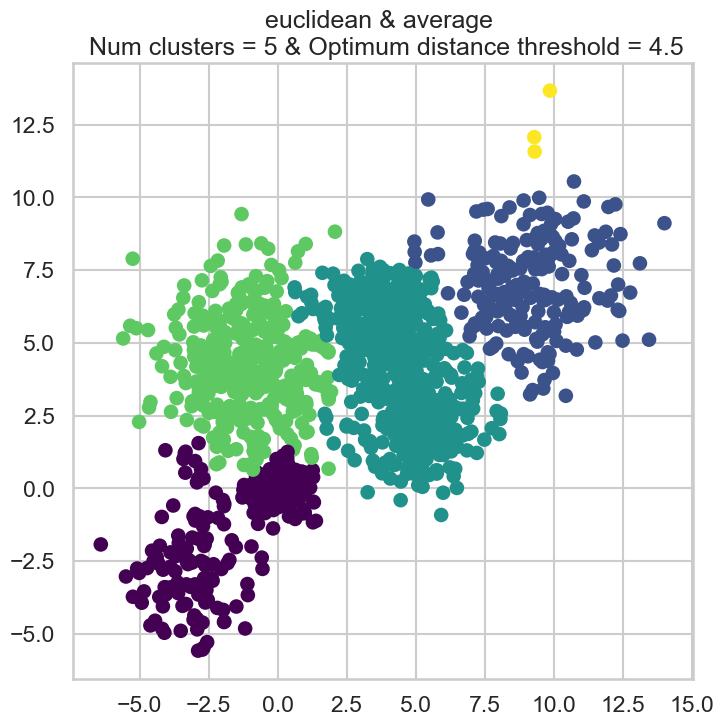

Optimum distance threshold = 4.5
Number of Clusters = 5
Score = 0.433187948807373
testing....
[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001, 1.5000000000000002, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5000000000000004, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0000000000000004, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5000000000000004, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1, 4.2, 4.3, 4.3999999999999995, 4.5, 4.6, 4.7, 4.8, 4.9]
[0.18751896464403853, 0.32408700608472596, 0.3688706198966084, 0.37693226678971054, 0.3743241305054595, 0.35605524721735804, 0.3531686465808015, 0.35084225826059845, 0.340398001467256, 0.32384977908646284, 0.3226423235447607, 0.3062872224099649, 0.27627942852578985, 0.2814608749534322, 0.2955860015793413, 0.28934872645502846, 0.31286488527108

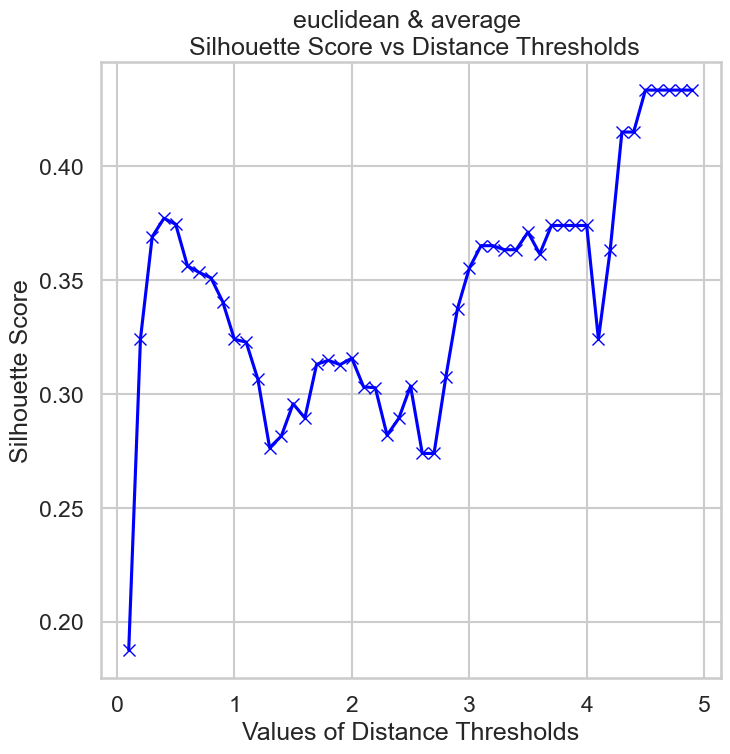

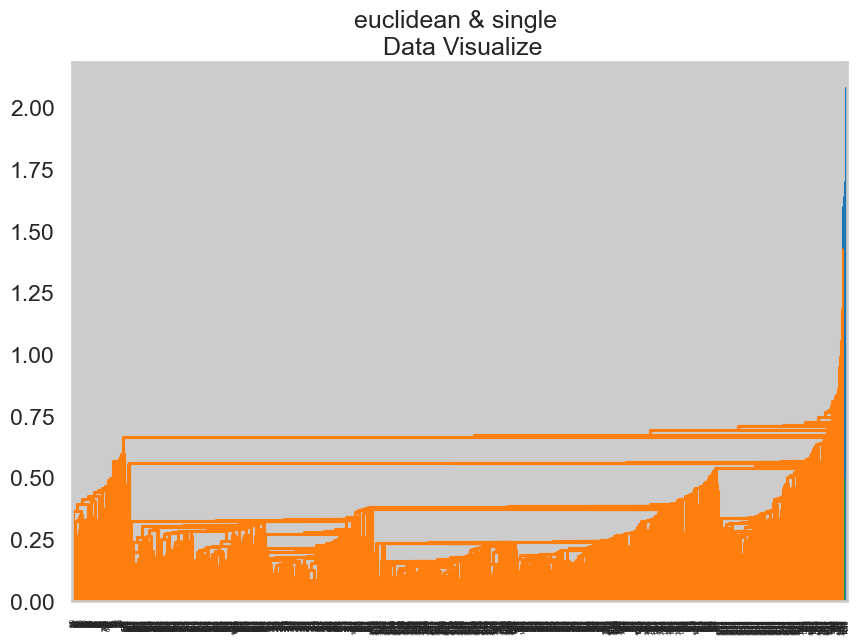

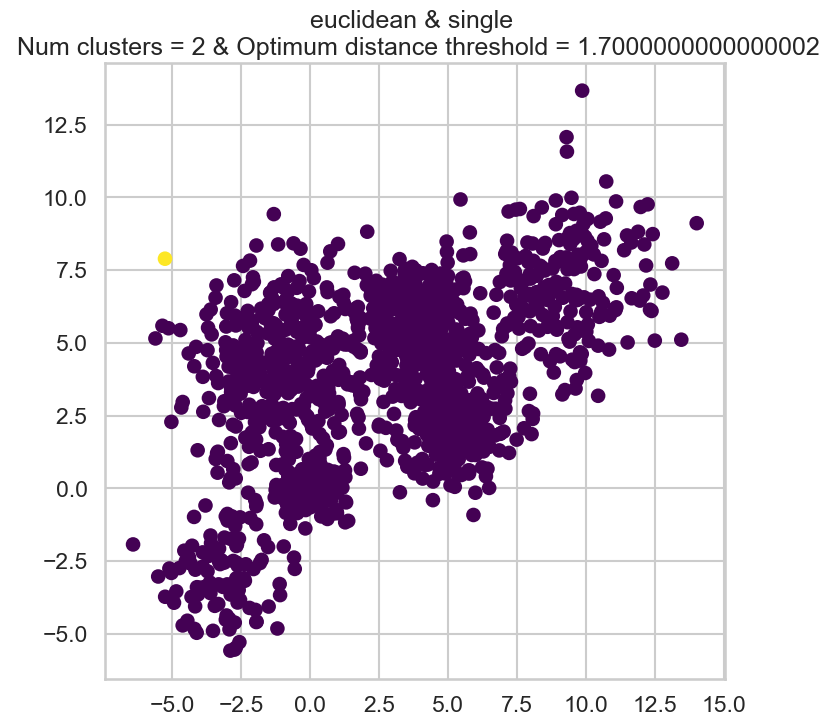

Optimum distance threshold = 1.7000000000000002
Number of Clusters = 2
Score = 0.3218066204847175
testing....
[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001, 1.5000000000000002, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000001, 2.0]
[0.1764277949915988, 0.0876289177252096, -0.1934284675683028, -0.45076535230405623, -0.4596550259264691, -0.42389336969573504, -0.4410461549199919, -0.41297230277201613, -0.1690982884718736, -0.14944154607335855, -0.144702446818925, 0.08705564851389591, 0.08705564851389591, 0.08705564851389591, 0.17400752332621522, 0.2074012584493559, 0.3218066204847175, 0.3218066204847175, 0.3218066204847175, 0.3218066204847175]


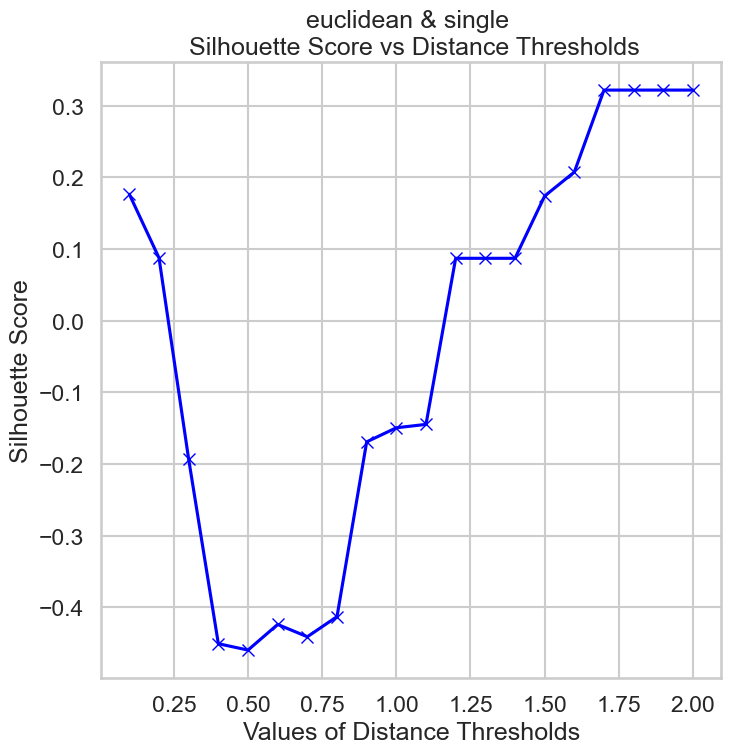

In [ ]:
#euclidean & average
[hierarchial_Multi_blob_Data_score1, hierarchial_Multi_blob_Data_cluster1, hierarchial_Multi_blob_Data_best_silhouette1] = hierarchial_clustering(Multi_blob_Data, "euclidean", "average")

#euclidean & single
[hierarchial_Multi_blob_Data_score2, hierarchial_Multi_blob_Data_cluster2, hierarchial_Multi_blob_Data_best_silhouette2] = hierarchial_clustering(Multi_blob_Data, "euclidean", "single")

#manhattan & average
[hierarchial_Multi_blob_Data_score3, hierarchial_Multi_blob_Data_cluster3, hierarchial_Multi_blob_Data_best_silhouette3] = hierarchial_clustering(Multi_blob_Data, "manhattan", "average")

#manhattan & single
[hierarchial_Multi_blob_Data_score4, hierarchial_Multi_blob_Data_cluster4, hierarchial_Multi_blob_Data_best_silhouette4] = hierarchial_clustering(Multi_blob_Data, "manhattan", "single")

#cosine & average
[hierarchial_Multi_blob_Data_score5, hierarchial_Multi_blob_Data_cluster5, hierarchial_Multi_blob_Data_best_silhouette5] = hierarchial_clustering(Multi_blob_Data, "cosine", "average")

#cosine & single
[hierarchial_Multi_blob_Data_score6, hierarchial_Multi_blob_Data_cluster6, hierarchial_Multi_blob_Data_best_silhouette6] = hierarchial_clustering(Multi_blob_Data, "cosine", "single")

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
def DBScan(X):
    # Initialize lists to store scores and parameters
    scores = []
    eps_list = []
    min_samples_list = []

    # Loop over different values of eps and min_samples
    for eps in np.arange(start=0.1, stop=3.1, step=0.1):
        for min_samples in range(5, 26):
            # Perform DBSCAN clustering
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            # Get cluster labels
            labels = db.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # exclude noise points
            if n_clusters > 1:
                # Calculate silhouette score
                score = silhouette_score(X, labels)
                # Append score and parameters to lists
                scores.append(score)
                eps_list.append(eps)
                min_samples_list.append(min_samples)
            else:
                break

    if(len(scores)>0):
        # Plot silhouette score versus eps and min_samples
        plt.scatter(eps_list, min_samples_list, c=scores, cmap='viridis')
        plt.xlabel('EPS')
        plt.ylabel('Min samples')
        plt.title('Silhouette score for DBSCAN')
        plt.colorbar()
        plt.show()
    
        # Find the best score and parameters
        best_index = np.argmax(scores)
        best_score = scores[best_index]
        best_eps = eps_list[best_index]
        best_min_samples = min_samples_list[best_index]

        # Print the best score and parameters
        print(f'The best silhouette score is {best_score:.3f} with eps={best_eps:.1f} and min_samples={best_min_samples}')

        # Plot the resulting clusters with the best parameters
        db_best = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
        labels_best = db_best.labels_
        plt.scatter(X[:, 0], X[:, 1], c=labels_best, cmap='rainbow')
        # plt.xlabel('X1')
        # plt.ylabel('X2')
        plt.title(f'Clusters with eps={best_eps:.1f} and min_samples={best_min_samples}')
        plt.show()
    else:
        print("No clusters found")

In [ ]:
DBScan(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [ ]:
def gaussian_method(X):
    covariance_types = ['full', 'tied', 'diag', 'spherical']
    n_components_range = range(2, 15)
    bic_scores = {}
    best_gmm = {}
    
    for covariance_type in covariance_types:
        bic_scores[covariance_type] = []
        best_bic = np.inf
        best_n_components = None
        
        for n_components in n_components_range:
            # Fit a Gaussian Mixture Model with n_components and covariance_type
            gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
            gmm.fit(X)

            # Compute the BIC score
            bic = gmm.bic(X)
            bic_scores[covariance_type].append(bic)
            
            # Update the best model if this model has a lower BIC score
            if bic < best_bic:
                best_bic = bic
                best_n_components = n_components
                best_gmm[covariance_type] = gmm
                
        # Plot the best model for this covariance_type
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=best_gmm[covariance_type].predict(X))
        x = np.linspace(X[:, 0].min(), X[:, 0].max())
        y = np.linspace(X[:, 1].min(), X[:, 1].max())
        X_grid, Y_grid = np.meshgrid(x, y)
        XY = np.array([X_grid.ravel(), Y_grid.ravel()]).T
        Z = best_gmm[covariance_type].score_samples(XY).reshape(X_grid.shape)
        plt.contour(X_grid, Y_grid, Z)
        plt.title(f'GMM with {best_n_components} components and {covariance_type} covariance')
        plt.show()
        
    # Plot the BIC scores for each n_components and covariance_type
    plt.figure(figsize=(8, 6))
    for covariance_type in covariance_types:
        plt.plot(list(n_components_range), bic_scores[covariance_type], label=covariance_type)
    plt.legend()
    plt.xlabel('Number of components')
    plt.ylabel('BIC score')
    plt.title('BIC scores for different numbers of components and covariance types')
    plt.show()

In [ ]:
gaussian_method(Multi_blob_Data)

In [ ]:
#GaussianMixture(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

# K-Mean - iris data set

In [ ]:
k_mean_iris_data_silhouette_score = K_mean(iris_data.data)

# Normalized K-Mean - iris data set

In [ ]:
from sklearn.preprocessing import normalize

normalized_k_mean_iris_data_silhouette_score = K_mean(normalize(iris_data.data, axis=0))

# Hierarchal Clustering - iris data set

In [ ]:
#euclidean & average
[hierarchial_iris_data_score1, hierarchial_iris_data_cluster1, hierarchial_iris_data_best_silhouette1] = hierarchial_clustering(iris_data.data, "euclidean", "average")

#euclidean & single
[hierarchial_iris_data_score2, hierarchial_iris_data_cluster2, hierarchial_iris_data_best_silhouette2] = hierarchial_clustering(iris_data.data, "euclidean", "single")

#manhattan & average
[hierarchial_iris_data_score3, hierarchial_iris_data_cluster3, hierarchial_iris_data_best_silhouette3] = hierarchial_clustering(iris_data.data, "manhattan", "average")

#manhattan & single
[hierarchial_iris_data_score4, hierarchial_iris_data_cluster4, hierarchial_iris_data_best_silhouette4] = hierarchial_clustering(iris_data.data, "manhattan", "single")

#cosine & average
[hierarchial_iris_data_score5, hierarchial_iris_data_cluster5, hierarchial_iris_data_best_silhouette5] = hierarchial_clustering(iris_data.data, "cosine", "average")

#cosine & single
[hierarchial_iris_data_score6, hierarchial_iris_data_cluster6, hierarchial_iris_data_best_silhouette6] = hierarchial_clustering(iris_data.data, "cosine", "single")

# Normalized Heirarchal Clustering - iris data set

In [ ]:
#euclidean & average
[normalized_hierarchial_iris_data_score1, normalized_hierarchial_iris_data_cluster1, normalized_hierarchial_iris_data_best_silhouette1] = hierarchial_clustering(normalize(iris_data.data, axis=0), "euclidean", "average")

#euclidean & single
[normalized_hierarchial_iris_data_score2, normalized_hierarchial_iris_data_cluster2, normalized_hierarchial_iris_data_best_silhouette2] = hierarchial_clustering(normalize(iris_data.data, axis=0), "euclidean", "single")

#manhattan & average
[normalized_hierarchial_iris_data_score3, normalized_hierarchial_iris_data_cluster3, normalized_hierarchial_iris_data_best_silhouette3] = hierarchial_clustering(normalize(iris_data.data, axis=0), "manhattan", "average")

#manhattan & single
[normalized_hierarchial_iris_data_score4, normalized_hierarchial_iris_data_cluster4, normalized_hierarchial_iris_data_best_silhouette4] = hierarchial_clustering(normalize(iris_data.data, axis=0), "manhattan", "single")

#cosine & average
[normalized_hierarchial_iris_data_score5, normalized_hierarchial_iris_data_cluster5, normalized_hierarchial_iris_data_best_silhouette5] = hierarchial_clustering(normalize(iris_data.data, axis=0), "cosine", "average")

#cosine & single
[normalized_hierarchial_iris_data_score6, normalized_hierarchial_iris_data_cluster6, normalized_hierarchial_iris_data_best_silhouette6] = hierarchial_clustering(normalize(iris_data.data, axis=0), "cosine", "single")

# DB Scan - iris data set

In [ ]:
DBScan(iris_data.data)

# Normalized DB Scan - iris data set

In [ ]:
DBScan(normalize(iris_data.data, axis=0))

# Gaussian Mixture - iris data set

In [ ]:
gaussian_method(iris_data.data[:, :2])

# Normalized Gaussian Mixture - iris data set

In [ ]:
gaussian_method(normalize(iris_data.data[:, :2]))

# Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df = pd.read_csv("C:/Users/BETER/Desktop/Semester 10/ML/Assignments/Assignment1/Customer data.csv", index_col=0)


# K-Mean - customer data set 

In [ ]:
k_mean_df_silhouette_score = K_mean(df)

# Hierarchal Clustering - customer data set 

In [ ]:
#euclidean & average
[hierarchial_df_score1, hierarchial_df_cluster1, hierarchial_df_best_silhouette1] = hierarchial_clustering(df, "euclidean", "average")

#euclidean & single
[hierarchial_df_score2, hierarchial_df_cluster2, hierarchial_df_best_silhouette2] = hierarchial_clustering(df, "euclidean", "single")

#manhattan & average
[hierarchial_df_score3, hierarchial_df_cluster3, hierarchial_df_best_silhouette3] = hierarchial_clustering(df, "manhattan", "average")

#manhattan & single
[hierarchial_df_score4, hierarchial_df_cluster4, hierarchial_df_best_silhouette4] = hierarchial_clustering(df, "manhattan", "single")

#cosine & average
[hierarchial_df_score5, hierarchial_df_cluster5, hierarchial_df_best_silhouette5] = hierarchial_clustering(df, "cosine", "average")

#cosine & single
[hierarchial_df_score6, hierarchial_df_cluster6, hierarchial_df_best_silhouette6] = hierarchial_clustering(df, "cosine", "single")

# DB Scan - customer data set 

In [ ]:
DBScan(df[['Age', 'Income', 'Settlement size']])

# Gaussian Mixture - customer data set 

In [ ]:
gaussian_method(df[['Age', 'Income', 'Settlement size']].values[:, :2])